# Задание


В качестве данных возьмем датасет о доходах граждан в различных странах [Adult Income](https://archive.ics.uci.edu/ml/datasets/Adult). Скачайте две таблицы для обучения и теста. 

Далее выполните этапы машинного обучени последовательно:



1. Подготовьте данные для анализа. 
* Выведите первые 10 строк данных. 
* Посчитайте размерность данных. 
* Выведите количество пропущенных значений  и тип для каждой переменной. 
* Далее в блокноте приведено решение для этапа предобработки данных, изучите и обработайте входные данные для тестовой выборки по аналогии с обучающей.
2. Постройте модель логистической регрессии. 
* Разбейте таблицу данных на матрицы X и y
* Обучите логистическую регрессию
3. Провалидируйте модель на тестовых данных
 * Сделайте предсказания на тренировочной выборке 
 * Вычислите вероятности принадлежности к классам для каждого объекта из тестовой выборки
4. Оцените качество модели на основе предсказаний по тестовой выборке по помощи стандартных метрик качества для регрессионных моделей.

На каждом этапе  пропишите ваши выводы.

# Критерии оценки: 

1. Наличие выполненного первого задания без ошибок  – 0,5 балл.
2. Наличие выполненного второго задания без ошибок  - 0,5 балл. 
3. Наличие выполненного третьего задания без ошибок  0,5 балл. 
4. Наличие выполненного четвертого задания без ошибок - 0,5 балл.
5. Наличие выводов по каждому этапу - 1 балл.

## 1. Подготовка данных для анализа

Импортируем pandas.

In [1]:
import pandas as pd

В файлах с данными нет названий столбцов, так что укажем их вручную.

In [2]:
columns_list = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

Загрузим обучающую выборку.

In [3]:
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=columns_list, header=None)

Загрузим тестовую выборку.

Первая строка файла выглядит так: "|1x3 Cross validator".

Эта строка не только не содержит полезной информации, но и мешает правильному преобразованию файла в DataFrame. Удалим ее.

In [4]:
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names=columns_list, header=None, skiprows=1)

Выведем первые 10 строк обучающей выборки.

In [5]:
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Выведем размерность обучающей выборки.

In [6]:
train.shape

(32561, 15)

Выведите количество пропущенных значений и тип для каждой переменной обучающей выборки.

Видно, что пропущенных значений нет.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Выведем первые 10 строк тестовой выборки.

In [8]:
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


Выведем размерность тестовой выборки.

In [9]:
test.shape

(16281, 15)

Выведите количество пропущенных значений и тип для каждой переменной тестовой выборки.

Видно, что пропущенных значений нет.

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Формат целевой переменной отличается в обучающей и тестовой выборках.

Чтобы дальнейшая предобработка происходила правильно, преобразуем целевую переменную тестовой выборки к формату обучающей выборки.

In [11]:
train['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [12]:
test['salary'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: salary, dtype: int64

In [13]:
test['salary'] = test['salary'].apply(lambda x: x[:-1])
test['salary'].value_counts()

 <=50K    12435
 >50K      3846
Name: salary, dtype: int64

Проведем предобработку обучающей и тестовой выборок.

In [14]:
# Удалим лишние признаки
train.drop(['native-country'], axis=1, inplace=True)
test.drop(['native-country'], axis=1, inplace=True)

# Преобразуем целевую переменную в бинарные значения, ниже 50 тысяч - 0, выше -1
train['salary'] = (train['salary'] != ' <=50K').astype('int32')
test['salary'] = (test['salary'] != ' <=50K').astype('int32')

# Преобразуем категориальные данные в числовые
train = pd.get_dummies(train, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
test = pd.get_dummies(test, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

Выведем на экран промежуточные результаты предобработки обучающей выборки.

In [15]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Выведем на экран промежуточные результаты предобработки тестовой выборки.

In [16]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,226802,7,0,0,40,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


Проведем нормализацию нуждающихся в этом признаков обучающей и тестовой выборок.

In [17]:
# Нормализовать нуждающиеся в этом признаки
a_features = train[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
train.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

a_features = test[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
test.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

Выведем на экран подмножество обучающей выборки после нормализации.

In [18]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Выведем на экран размерность обучающей выборки. Количество столбцов увеличилось после one-hot кодирования.

In [19]:
train.shape

(32561, 67)

Выведем на экран подмножество тестовой выборки после нормализации.

In [20]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,-0.994129,0.353474,-1.196864,-0.142662,-0.218062,-0.031432,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,-0.055417,-0.942391,-0.417886,-0.142662,-0.218062,0.769918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.777503,1.395450,0.750582,-0.142662,-0.218062,-0.031432,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0.377835,-0.275397,-0.028397,0.871091,-0.218062,-0.031432,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-1.499590,-0.812954,-0.028397,-0.142662,-0.218062,-0.832781,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


Выведем на экран размерность тестовой выборки. Количество столбцов увеличилось после one-hot кодирования.

In [21]:
test.shape

(16281, 67)

## 2. Построение модели логистической регрессии

Отделим целевую переменную от данных.

In [22]:
x_train = train.drop('salary', axis=1)
x_test = test.drop('salary', axis=1)
y_train = train['salary']
y_test = test['salary']

Видно, что классы несбалансированны.

In [23]:
y_train.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [24]:
y_test.value_counts()

0    12435
1     3846
Name: salary, dtype: int64

Обучим модель логистической регрессии.

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, n_jobs=-1)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

При обучении модели понадобилось увеличить максимальное количество итераций, чтобы lbfgs успел сойтись. Это нужно для улучшения качества модели.

## 3. Валидация модели на тестовых данных

Получим прогноз модели на обучающей выборке.

In [26]:
prediction_train = lr.predict(x_train)
prediction_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

Вычислим вероятности принадлежности к классам для каждого объекта из тестовой выборки.

In [27]:
class_probabilities_test = lr.predict_proba(x_test)

Получим вероятности принадлежности к классу 1 (>50K) для каждого объекта тестовой выборки. Это понадобится для вычисления значений ошибки.

In [28]:
class1_index = list(lr.classes_).index(1)
probabilities_test = class_probabilities_test[:, class1_index]
probabilities_test

array([0.00229609, 0.11927035, 0.38280301, ..., 0.69071861, 0.21014792,
       0.79035489])

Построим график распределения вероятностей принадлежности к классу 1 (>50K)

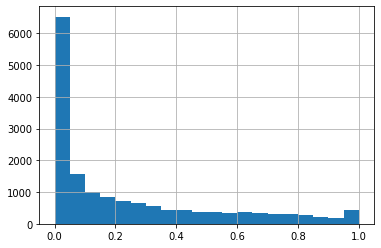

In [42]:
pd.Series(probabilities_test).hist(bins=20)

Получим прогноз модели на тестовой выборке.

In [29]:
prediction_test = lr.predict(x_test)

В прогнозах модели классы несбалансированны еще сильнее, чем в изначальных данных, модель недооценивает количество моделей, относящихся к классу 1 (>50k)

In [46]:
pd.Series(prediction_train).value_counts()

0    26153
1     6408
dtype: int64

In [47]:
pd.Series(prediction_test).value_counts()

0    13123
1     3158
dtype: int64

## 4. Оценка качества модели на основе предсказаний по тестовой выборке по помощи стандартных метрик качества для регрессионных моделей

Импортируем нужные метрики.

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Вычислим значения метрик для прогноза модели на тестовой выборке (который принимает значения 0 и 1)

In [31]:
mean_squared_error(y_test, prediction_test)

0.14716540753024998

In [32]:
mean_squared_error(y_test, prediction_test, squared=False)

0.38362143778763197

In [33]:
mean_absolute_error(y_test, prediction_test)

0.14716540753024998

In [34]:
r2_score(y_test, prediction_test)

0.18433313448340083

Вычислим значения метрик для вероятностей классов объектов из тестовой выборки (которые принимают значения от 0 до 1)

In [35]:
mean_squared_error(y_test, probabilities_test)

0.10173070135570543

In [36]:
mean_squared_error(y_test, probabilities_test, squared=False)

0.3189525064264356

In [37]:
mean_absolute_error(y_test, probabilities_test)

0.20294901121323047

In [38]:
r2_score(y_test, probabilities_test)

0.4361557943937523

Интересно, что в данном случае MSE меньше, чем RMSE. Так получается из-за того, что значения ошибок меньше или равны 1.

В случае вероятностей классов значения всех метрик, кроме MAE, получились лучше, чем в случае значений классов.

R2 в обоих случаях низок (особенно в случае значений классов). Это значит, что модель объясняет достаточно малую долю дисперсию целевой переменной.

В целом, значения метрик качества регрессионной модели сложно интерпретировать в задаче классификации. Для оценки качества модели в задачах классификации обычно используется другой класс метрик (этим метрикам посвящен следующий блок 1.5).